<a href="https://colab.research.google.com/github/anilbhatt1/Skunkworks_Mediapipe_Jitter/blob/main/Mediapipe_pose_stabilize_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [ ]:
# Minimum dependency for MediaPipe Solutions Python API is opencv-python
!pip install opencv-python~=3.4.11
!pip install mediapipe

     |████████████████████████████████| 49.1MB 87kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 34.5MB 119kB/s 


Upload any image that that has a person with visible upper body to the Colab. We took an example from the web: https://www.latimes.com/sports/soccer/story/2020-08-25/lionel-messi-informs-fc-barcelona-he-wants-to-leave-team


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Messi.jpg to Messi.jpg


pose.jpg


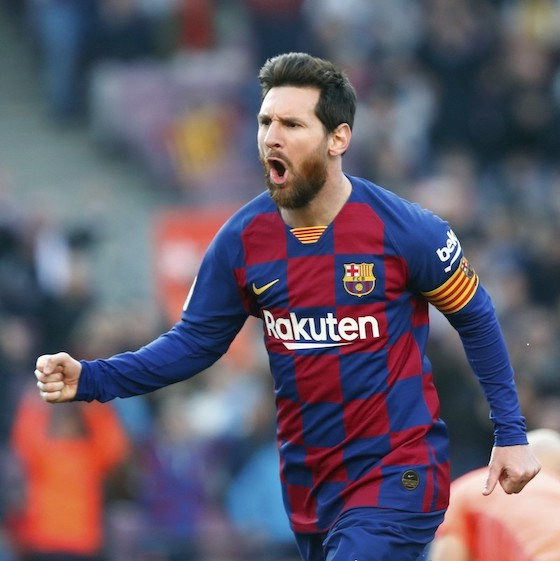

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose

help(mp_pose.Pose)

# Initialize MediaPipe Pose.
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Usage examples:
 |    import cv2
 |    import mediapipe as mp
 |    mp_drawing = mp.solutions.drawing_utils
 |    mp_pose = mp.solutions.pose
 |  
 |    # For static images:
 |    pose = mp_pose.Pose(
 |        static_image_mode=True, min_detection_confidence=0.5)
 |    for idx, file in enumerate(file_list):
 |      image = cv2.imread(file)
 |      # Convert the BGR image to RGB before processing.
 |      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 |  
 |      # Print and draw pose landmarks on the image.
 |      print(
 |          'nose landmark:',
 |           results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
 |      annotated_image = image.copy()
 |      mp_drawing.draw_landmarks(
 |          

Nose landmark:
x: 0.48000144958496094
y: 0.2681480050086975
z: 0.0014891722239553928
visibility: 11.301165580749512
presence: 0.0

Pose landmarks of pose.jpg:


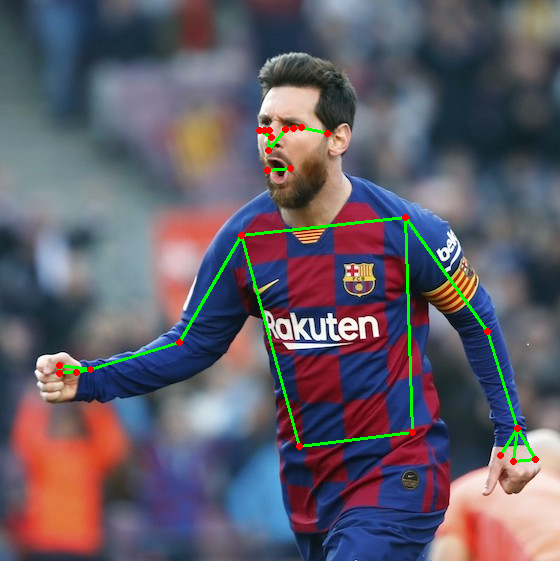

In [ ]:
mp_drawing = mp.solutions.drawing_utils 
for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Print nose landmark.
  print('Nose landmark:'),
  print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

  # Draw pose landmarks.
  print(f'Pose landmarks of {name}:')
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_pose.POSE_CONNECTIONS)
  cv2_imshow(annotated_image)

In [ ]:
import numpy as np
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose    = mp.solutions.pose

pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
cap = cv2.VideoCapture('/content/9secs_avi.avi')

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/9secs_pose_v6.avi',fourcc, 20.0, (352,640))

i, prev, delta = 0, 0, 0
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret==True:
        i += 1
        image = cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        # write the flipped frame
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        if i > 1:
            delta = abs((results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_INNER].x)-prev)/prev
        else: 
            delta = 0    
        print('Frame#:',i, 'Right-Eye X Curr:',(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_INNER].x),'Prev:', prev, 'Delta:', delta)
        prev = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_INNER].x)
        out.write(image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print('End of Frame # :', i)
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

Frame#: 1 Right-Eye X Curr: 0.5763444900512695 Prev: 0 Delta: 0
Frame#: 2 Right-Eye X Curr: 0.5765669941902161 Prev: 0.5763444900512695 Delta: 0.0003860610152215388
Frame#: 3 Right-Eye X Curr: 0.5723379850387573 Prev: 0.5765669941902161 Delta: 0.007334809647573308
Frame#: 4 Right-Eye X Curr: 0.5715479850769043 Prev: 0.5723379850387573 Delta: 0.0013803032168125805
Frame#: 5 Right-Eye X Curr: 0.5706636905670166 Prev: 0.5715479850769043 Delta: 0.0015471920695664942
Frame#: 6 Right-Eye X Curr: 0.5773935317993164 Prev: 0.5706636905670166 Delta: 0.011793007586680298
Frame#: 7 Right-Eye X Curr: 0.5776552557945251 Prev: 0.5773935317993164 Delta: 0.0004532852912174762
Frame#: 8 Right-Eye X Curr: 0.573814868927002 Prev: 0.5776552557945251 Delta: 0.006648233230806504
Frame#: 9 Right-Eye X Curr: 0.5729238390922546 Prev: 0.573814868927002 Delta: 0.0015528176124356707
Frame#: 10 Right-Eye X Curr: 0.5717541575431824 Prev: 0.5729238390922546 Delta: 0.0020416004174752425
Frame#: 11 Right-Eye X Curr: 0.

In [ ]:
type(results.pose_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
print(mp_pose.POSE_CONNECTIONS)

frozenset({(<PoseLandmark.LEFT_EYE: 5>, <PoseLandmark.LEFT_EYE_OUTER: 6>), (<PoseLandmark.RIGHT_SHOULDER: 11>, <PoseLandmark.RIGHT_HIP: 23>), (<PoseLandmark.RIGHT_WRIST: 15>, <PoseLandmark.RIGHT_INDEX: 19>), (<PoseLandmark.RIGHT_EYE_OUTER: 3>, <PoseLandmark.RIGHT_EAR: 7>), (<PoseLandmark.RIGHT_EYE_INNER: 1>, <PoseLandmark.RIGHT_EYE: 2>), (<PoseLandmark.LEFT_SHOULDER: 12>, <PoseLandmark.LEFT_HIP: 24>), (<PoseLandmark.LEFT_WRIST: 16>, <PoseLandmark.LEFT_THUMB: 22>), (<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 4>), (<PoseLandmark.LEFT_WRIST: 16>, <PoseLandmark.LEFT_PINKY: 18>), (<PoseLandmark.LEFT_PINKY: 18>, <PoseLandmark.LEFT_INDEX: 20>), (<PoseLandmark.RIGHT_SHOULDER: 11>, <PoseLandmark.RIGHT_ELBOW: 13>), (<PoseLandmark.RIGHT_PINKY: 17>, <PoseLandmark.RIGHT_INDEX: 19>), (<PoseLandmark.LEFT_SHOULDER: 12>, <PoseLandmark.LEFT_ELBOW: 14>), (<PoseLandmark.LEFT_EYE_INNER: 4>, <PoseLandmark.LEFT_EYE: 5>), (<PoseLandmark.RIGHT_ELBOW: 13>, <PoseLandmark.RIGHT_WRIST: 15>), (<PoseLandm

In [ ]:
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EYE_INNER])
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EYE])
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EYE_OUTER])

x: 0.4569720923900604
y: 0.30546021461486816
z: -0.0048371716402471066
visibility: 10.87488842010498
presence: 0.0

x: 0.44183149933815
y: 0.30936336517333984
z: 0.005115749314427376
visibility: 9.975482940673828
presence: 0.0

x: 0.4267614483833313
y: 0.31316691637039185
z: 0.01404348574578762
visibility: 9.392760276794434
presence: 0.0



In [ ]:
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_INNER].x)

0.4991156756877899


In [ ]:
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_INNER])
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE])
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_OUTER])

x: 0.4991156756877899
y: 0.29652610421180725
z: -0.0052714720368385315
visibility: 10.721405029296875
presence: 0.0

x: 0.5133896470069885
y: 0.29367274045944214
z: -0.009046086110174656
visibility: 9.87165641784668
presence: 0.0

x: 0.5278810858726501
y: 0.29078975319862366
z: 0.004164726007729769
visibility: 9.089812278747559
presence: 0.0



In [ ]:
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP])
print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP])

x: 0.6923063397407532
y: 0.6873743534088135
z: 0.5056589841842651
visibility: 2.053391695022583
presence: 0.0

x: 0.4208572208881378
y: 0.6970747113227844
z: 0.5975162982940674
visibility: 2.086912155151367
presence: 0.0



In [ ]:
var

x: 0.8460419178009033
y: 0.4056815505027771
z: -0.0006627360708080232
visibility: 5.992568492889404
presence: 0.0

In [ ]:
var.x

0.8460419178009033

In [ ]:
var.x = 0.8460419178009034

In [ ]:
var.x

0.8460419178009033

In [ ]:
var.x

0.8460419178009033

In [ ]:
type(var)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmark

In [ ]:
new_obj = mp.framework.formats.landmark_pb2.NormalizedLandmark()

In [ ]:
new_obj.x

0.0

In [ ]:
var = results.pose_landmarks

In [ ]:
new_obj1 = mp.framework.formats.landmark_pb2.NormalizedLandmarkList()

In [ ]:
new_obj1 = results.pose_landmarks

In [ ]:
results.pose_landmarks

In [ ]:
new_obj1.landmark

[x: 0.5
y: 0.31666359305381775
z: 0.0020343197975307703
visibility: 10.888367652893066
presence: 0.0
, x: 0.4991156756877899
y: 0.29652610421180725
z: -0.0052714720368385315
visibility: 10.721405029296875
presence: 0.0
, x: 0.5133896470069885
y: 0.29367274045944214
z: -0.009046086110174656
visibility: 9.87165641784668
presence: 0.0
, x: 0.5278810858726501
y: 0.29078975319862366
z: 0.004164726007729769
visibility: 9.089812278747559
presence: 0.0
, x: 0.4569720923900604
y: 0.30546021461486816
z: -0.0048371716402471066
visibility: 10.87488842010498
presence: 0.0
, x: 0.44183149933815
y: 0.30936336517333984
z: 0.005115749314427376
visibility: 9.975482940673828
presence: 0.0
, x: 0.4267614483833313
y: 0.31316691637039185
z: 0.01404348574578762
visibility: 9.392760276794434
presence: 0.0
, x: 0.5524815917015076
y: 0.30072736740112305
z: -0.002652043243870139
visibility: 8.519429206848145
presence: 0.0
, x: 0.41152113676071167
y: 0.33104124665260315
z: 0.006314901635050774
visibility: 7.73287

In [ ]:
new_obj1.landmark[0].x = 0.5

In [ ]:
type(results.pose_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
obj = results.pose_landmarks

In [ ]:
obj.landmark

[x: 0.4969325065612793
y: 0.31666359305381775
z: 0.0020343197975307703
visibility: 10.888367652893066
presence: 0.0
, x: 0.4991156756877899
y: 0.29652610421180725
z: -0.0052714720368385315
visibility: 10.721405029296875
presence: 0.0
, x: 0.5133896470069885
y: 0.29367274045944214
z: -0.009046086110174656
visibility: 9.87165641784668
presence: 0.0
, x: 0.5278810858726501
y: 0.29078975319862366
z: 0.004164726007729769
visibility: 9.089812278747559
presence: 0.0
, x: 0.4569720923900604
y: 0.30546021461486816
z: -0.0048371716402471066
visibility: 10.87488842010498
presence: 0.0
, x: 0.44183149933815
y: 0.30936336517333984
z: 0.005115749314427376
visibility: 9.975482940673828
presence: 0.0
, x: 0.4267614483833313
y: 0.31316691637039185
z: 0.01404348574578762
visibility: 9.392760276794434
presence: 0.0
, x: 0.5524815917015076
y: 0.30072736740112305
z: -0.002652043243870139
visibility: 8.519429206848145
presence: 0.0
, x: 0.41152113676071167
y: 0.33104124665260315
z: 0.006314901635050774
visi

In [ ]:
obj.landmark[0].x = 0.47

In [ ]:
type(obj)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

x: 0.4699999988079071
y: 0.31666359305381775
z: 0.0020343197975307703
visibility: 10.888367652893066
presence: 0.0

In [ ]:
results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x = 0.47

In [ ]:
results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x

0.4699999988079071

In [ ]:
mp_drawing.draw_landmarks

In [ ]:
my_obj = results.pose_landmarks

In [ ]:
my_obj

landmark {
  x: 0.5
  y: 0.31666359305381775
  z: 0.0020343197975307703
  visibility: 10.888367652893066
  presence: 0.0
}
landmark {
  x: 0.4991156756877899
  y: 0.29652610421180725
  z: -0.0052714720368385315
  visibility: 10.721405029296875
  presence: 0.0
}
landmark {
  x: 0.5133896470069885
  y: 0.29367274045944214
  z: -0.009046086110174656
  visibility: 9.87165641784668
  presence: 0.0
}
landmark {
  x: 0.5278810858726501
  y: 0.29078975319862366
  z: 0.004164726007729769
  visibility: 9.089812278747559
  presence: 0.0
}
landmark {
  x: 0.4569720923900604
  y: 0.30546021461486816
  z: -0.0048371716402471066
  visibility: 10.87488842010498
  presence: 0.0
}
landmark {
  x: 0.44183149933815
  y: 0.30936336517333984
  z: 0.005115749314427376
  visibility: 9.975482940673828
  presence: 0.0
}
landmark {
  x: 0.4267614483833313
  y: 0.31316691637039185
  z: 0.01404348574578762
  visibility: 9.392760276794434
  presence: 0.0
}
landmark {
  x: 0.5524815917015076
  y: 0.30072736740112305

In [ ]:
obj1 = results.pose_landmarks

In [ ]:
results.pose_landmarks

landmark {
  x: 0.4969325065612793
  y: 0.31666359305381775
  z: 0.0020343197975307703
  visibility: 10.888367652893066
  presence: 0.0
}
landmark {
  x: 0.4991156756877899
  y: 0.29652610421180725
  z: -0.0052714720368385315
  visibility: 10.721405029296875
  presence: 0.0
}
landmark {
  x: 0.5133896470069885
  y: 0.29367274045944214
  z: -0.009046086110174656
  visibility: 9.87165641784668
  presence: 0.0
}
landmark {
  x: 0.5278810858726501
  y: 0.29078975319862366
  z: 0.004164726007729769
  visibility: 9.089812278747559
  presence: 0.0
}
landmark {
  x: 0.4569720923900604
  y: 0.30546021461486816
  z: -0.0048371716402471066
  visibility: 10.87488842010498
  presence: 0.0
}
landmark {
  x: 0.44183149933815
  y: 0.30936336517333984
  z: 0.005115749314427376
  visibility: 9.975482940673828
  presence: 0.0
}
landmark {
  x: 0.4267614483833313
  y: 0.31316691637039185
  z: 0.01404348574578762
  visibility: 9.392760276794434
  presence: 0.0
}
landmark {
  x: 0.5524815917015076
  y: 0.30

In [ ]:
obj1

landmark {
  x: 0.4969325065612793
  y: 0.31666359305381775
  z: 0.0020343197975307703
  visibility: 10.888367652893066
  presence: 0.0
}
landmark {
  x: 0.4991156756877899
  y: 0.29652610421180725
  z: -0.0052714720368385315
  visibility: 10.721405029296875
  presence: 0.0
}
landmark {
  x: 0.5133896470069885
  y: 0.29367274045944214
  z: -0.009046086110174656
  visibility: 9.87165641784668
  presence: 0.0
}
landmark {
  x: 0.5278810858726501
  y: 0.29078975319862366
  z: 0.004164726007729769
  visibility: 9.089812278747559
  presence: 0.0
}
landmark {
  x: 0.4569720923900604
  y: 0.30546021461486816
  z: -0.0048371716402471066
  visibility: 10.87488842010498
  presence: 0.0
}
landmark {
  x: 0.44183149933815
  y: 0.30936336517333984
  z: 0.005115749314427376
  visibility: 9.975482940673828
  presence: 0.0
}
landmark {
  x: 0.4267614483833313
  y: 0.31316691637039185
  z: 0.01404348574578762
  visibility: 9.392760276794434
  presence: 0.0
}
landmark {
  x: 0.5524815917015076
  y: 0.30

In [ ]:
obj1.landmark[0].x = 0.5

In [ ]:
obj1

landmark {
  x: 0.5
  y: 0.31666359305381775
  z: 0.0020343197975307703
  visibility: 10.888367652893066
  presence: 0.0
}
landmark {
  x: 0.4991156756877899
  y: 0.29652610421180725
  z: -0.0052714720368385315
  visibility: 10.721405029296875
  presence: 0.0
}
landmark {
  x: 0.5133896470069885
  y: 0.29367274045944214
  z: -0.009046086110174656
  visibility: 9.87165641784668
  presence: 0.0
}
landmark {
  x: 0.5278810858726501
  y: 0.29078975319862366
  z: 0.004164726007729769
  visibility: 9.089812278747559
  presence: 0.0
}
landmark {
  x: 0.4569720923900604
  y: 0.30546021461486816
  z: -0.0048371716402471066
  visibility: 10.87488842010498
  presence: 0.0
}
landmark {
  x: 0.44183149933815
  y: 0.30936336517333984
  z: 0.005115749314427376
  visibility: 9.975482940673828
  presence: 0.0
}
landmark {
  x: 0.4267614483833313
  y: 0.31316691637039185
  z: 0.01404348574578762
  visibility: 9.392760276794434
  presence: 0.0
}
landmark {
  x: 0.5524815917015076
  y: 0.30072736740112305

In [ ]:
results.pose_landmarks

landmark {
  x: 0.5
  y: 0.31666359305381775
  z: 0.0020343197975307703
  visibility: 10.888367652893066
  presence: 0.0
}
landmark {
  x: 0.4991156756877899
  y: 0.29652610421180725
  z: -0.0052714720368385315
  visibility: 10.721405029296875
  presence: 0.0
}
landmark {
  x: 0.5133896470069885
  y: 0.29367274045944214
  z: -0.009046086110174656
  visibility: 9.87165641784668
  presence: 0.0
}
landmark {
  x: 0.5278810858726501
  y: 0.29078975319862366
  z: 0.004164726007729769
  visibility: 9.089812278747559
  presence: 0.0
}
landmark {
  x: 0.4569720923900604
  y: 0.30546021461486816
  z: -0.0048371716402471066
  visibility: 10.87488842010498
  presence: 0.0
}
landmark {
  x: 0.44183149933815
  y: 0.30936336517333984
  z: 0.005115749314427376
  visibility: 9.975482940673828
  presence: 0.0
}
landmark {
  x: 0.4267614483833313
  y: 0.31316691637039185
  z: 0.01404348574578762
  visibility: 9.392760276794434
  presence: 0.0
}
landmark {
  x: 0.5524815917015076
  y: 0.30072736740112305

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
obj1 = mp.python.solution_base.SolutionOutputs()

AttributeError: ignored